In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

This example uses the [Toyota Corolla](https://www.kaggle.com/klkwak/toyotacorollacsv).

The dataset contains pricing of used Toyotal Corolla cars.

The data dictionary is

Variable   |	 	Description
- | -
Id   |		 	Record_ID
Model   |	 	Model Description
Price   |		 	Offer Price in EUROs
Age_08_04   |	 	Age in months as in August 2004
Mfg_Month  | 	 	Manufacturing month (1-12)
Mfg_Year  | 	 	Manufacturing Year
KM   	|	 	Accumulated Kilometers on odometer
Fuel_Type  | 		Fuel Type (Petrol, Diesel, CNG)
HP   	|		Horse Power
Met_Color   |	 	Metallic Color?  (Yes=1, No=0)
Color   |		 	Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic  | 	 	Automatic ( (Yes=1, No=0)
CC   	|	 	Cylinder Volume in cubic centimeters
Doors   |	 	Number of doors
Cylinders  | 	 	Number of cylinders
Gears   	| 	Number of gear positions
Quarterly_Tax  |	Quarterly road tax in EUROs
Weight   	|	Weight in Kilograms
Mfr_Guarantee   |	Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee  | 	BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period   |    Guarantee period in months
ABS   |		 	Anti-Lock Brake System (Yes=1, No=0)
Airbag_1   	| 	Driver_Airbag  (Yes=1, No=0)
Airbag_2 |  	 	Passenger Airbag  (Yes=1, No=0)
Airco   |		 	Airconditioning  (Yes=1, No=0)
Automatic_airco  | 	Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer   |	Boardcomputer  (Yes=1, No=0)
CD_Player   |	 	CD Player  (Yes=1, No=0)
Central_Lock |  	Central Lock  (Yes=1, No=0)
Powered_Windows |  	Powered Windows  (Yes=1, No=0)
Power_Steering |  	Power Steering  (Yes=1, No=0)
Radio   	|	Radio  (Yes=1, No=0)
Mistlamps   |	 	Mistlamps  (Yes=1, No=0)
Sport_Model |  	 	Sport Model  (Yes=1, No=0)
Backseat_Divider |       Backseat Divider  (Yes=1, No=0)
Metallic_Rim   |	 	Metallic Rim  (Yes=1, No=0)
Radio_cassette |  	Radio Cassette  (Yes=1, No=0)
Parking_Assistant  |  	Parking assistance system  (Yes=1, No=0)
Tow_Bar   |		Tow Bar  (Yes=1, No=0)


Predict the price of the car using linear regression and the `KM` (Accumulated Kilometers) as a predictor.

Interpret the model and evaluate its accuracy

In [4]:
data = pd.read_csv('data/ToyotaCorolla.csv')
data.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0


In [7]:

X = data[['KM']]
y = data['Price']

car_lm = LinearRegression()
car_lm.fit(X, y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

intercept  14508.140010779975
  Predictor  coefficient
0        KM    -0.055117


In [8]:
pred_y = car_lm.predict(X)
r2 = r2_score(y, pred_y)
r2

0.3248545891553044

In [16]:
data['yfit'] = pred_y

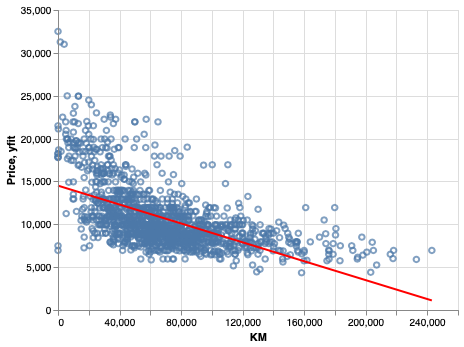

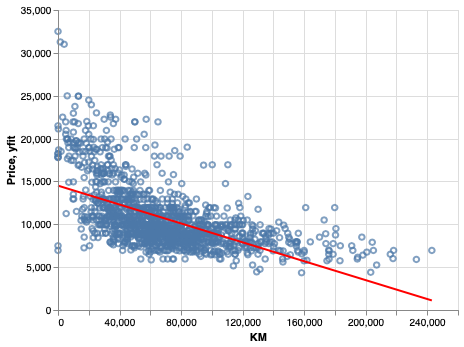

In [19]:
alt.Chart(data).mark_point().encode(x='KM', y='Price') + alt.Chart(
    data).mark_line(color='red').encode(x='KM', y='yfit')

